### Background

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


### Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?


### Data

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- Pregnancies: Number of times pregnant  
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test  
- BloodPressure: Diastolic blood pressure (mm Hg)  
- SkinThickness: Triceps skin fold thickness (mm)  
- Insulin: 2-Hour serum insulin (mu U/ml)  
- BMI: Body mass index (weight in kg/(height in m)^2)  
- DiabetesPedigreeFunction: Diabetes pedigree function  
- Age: Age (years)  
- Outcome: Class variable (0 or 1)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
plt.style.use('fivethirtyeight')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV


import pickle



In [2]:
# import matplotlib
# matplotlib.__version__

In [3]:
# pip install matplotlib==3.0.3

In [4]:
diab = pd.read_csv('./Data/diab_replaceMV.csv')

In [5]:
diab.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
diab.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [8]:
diab.shape

(768, 9)

### Let's do some predictive modeling

In [9]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Stratification:  
When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [10]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [11]:
X = diab[features]
y = diab['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, 
                                                    stratify=diab['Outcome'])# stratify the outcome

In [13]:
X_train.shape

(576, 8)

In [14]:
y_train.shape

(576,)

In [15]:
X_test.shape

(192, 8)

In [16]:
X_train.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
751,1,121.0,78.0,39.0,74.0,39.0,0.261,28
358,12,88.0,74.0,40.0,54.0,35.3,0.378,48


In [17]:
y_train.head(2)

751    0
358    0
Name: Outcome, dtype: int64

## Model 1: K-Nearest Neighbours

In [18]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [19]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [20]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 86.45833333333334 % and k = [3]


### Result Visualisation of KNN

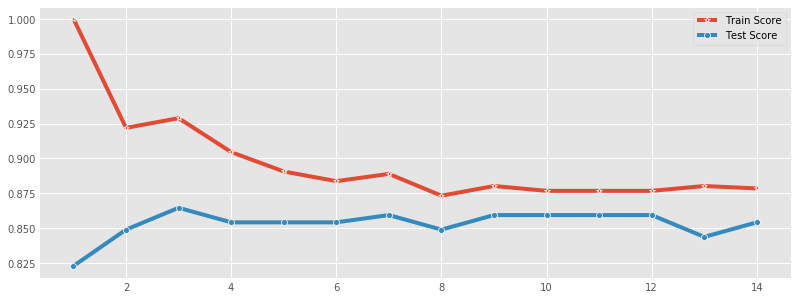

In [21]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

The best result is captured at k = 3 hence 3 is used for the final model

In [22]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.8645833333333334

### Confusion Matrix for KNN

In [23]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,116,9,125
1,17,50,67
All,133,59,192


Text(0.5, 18.5, 'Predicted label')

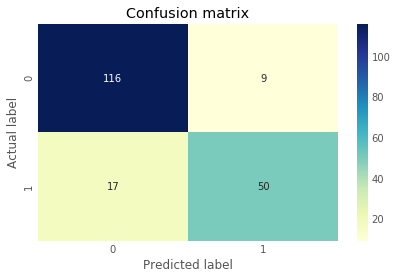

In [24]:
y_pred = knn.predict(X_test)

from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  y_pred).ravel()

print(confusion_matrix(y_test,
                       y_pred))

[[116   9]
 [ 17  50]]


In [26]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.7463


In [27]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.928


### Classification Report of KNN

Report which includes Precision, Recall and F1-Score.

In [28]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       125
           1       0.85      0.75      0.79        67

    accuracy                           0.86       192
   macro avg       0.86      0.84      0.85       192
weighted avg       0.86      0.86      0.86       192



### Precision :

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 

Precision = TP/TP+FP

### Recall (Sensitivity) :

Recall is the ratio of correctly predicted positive observations to the all observations in actual class  

Recall = TP/TP+FN

### F1 score :


F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

F1 Score = 2(Recall * Precision) / (Recall + Precision)

### ROC - AUC of KNN

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.

In [29]:
knn.fit(X = X_train,
        y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [30]:
knn.score(X_train, y_train)

0.9288194444444444

In [31]:
knn.score(X_test, y_test)

0.8645833333333334

In [32]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

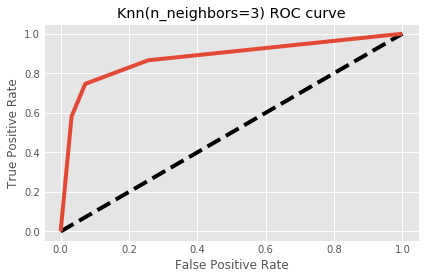

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=3) ROC curve')
plt.show()

In [34]:
# Area under ROC curve

roc_auc_score(y_test,y_pred_proba)

0.8782089552238805

### Hyper Parameter optimization for KNN

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [35]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.87109375
Best Parameters: {'n_neighbors': 14}


## Model 2: Support Vector Machine(SVM)

In [36]:
types=['rbf','linear']
for i in types:
    model_svm=svm.SVC(kernel=i)
    model_svm.fit(X_train,y_train)
    prediction=model_svm.predict(X_test)
    print('Accuracy for SVM kernel=',i,'is',metrics.accuracy_score(prediction,y_test))

Accuracy for SVM kernel= rbf is 0.6510416666666666
Accuracy for SVM kernel= linear is 0.7552083333333334


Text(0.5, 18.5, 'Predicted label')

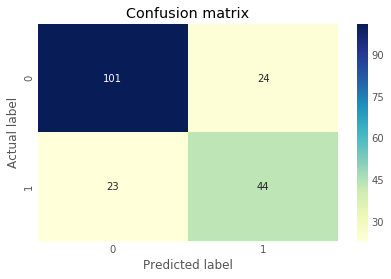

In [37]:
y_pred_svm = model_svm.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Model 3: Logistic Regression

In [38]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
prediction=model_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.7135416666666666


Text(0.5, 18.5, 'Predicted label')

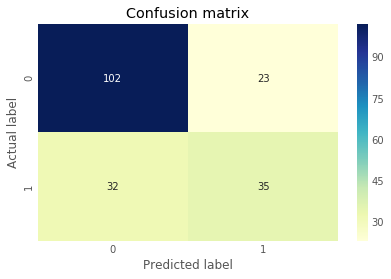

In [39]:
y_pred_lr = model_lr.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       125
           1       0.60      0.52      0.56        67

    accuracy                           0.71       192
   macro avg       0.68      0.67      0.67       192
weighted avg       0.71      0.71      0.71       192



## Model 4: Decision Tree

In [41]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
prediction=model_dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.8385416666666666


In [42]:
print(f'Score on training set: {model_dt.score(X_train, y_train)}')
print(f'Score on testing set: {model_dt.score(X_test, y_test)}')

Score on training set: 1.0
Score on testing set: 0.8385416666666666


In [43]:
model_dt = DecisionTreeClassifier(max_depth = 5,
                           min_samples_split = 7,
                           min_samples_leaf = 3,
                           random_state = 42)

In [44]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [45]:
print(f'Score on training set: {model_dt.score(X_train, y_train)}')
print(f'Score on testing set: {model_dt.score(X_test, y_test)}')

Score on training set: 0.9270833333333334
Score on testing set: 0.8385416666666666


#### Let's GridSearch to try to find the best tree

In [46]:
grid = {
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : [5, 10, 15, 20],
    'min_samples_leaf' : [2, 3, 4, 5, 6, 7]
}

In [47]:
import time

# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42),
                 grid,
                 cv = 5)

gs.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)

2.5220351219177246


In [48]:
# What is our best decision tree?
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 15}

In [49]:
# What was the cross-validated score of the above decision tree?
gs.best_score_

0.8506944444444444

In [50]:
# Instantiate model with best parameters.

model_dt = gs.best_estimator_
# Fit model.
model_dt.fit(X_train, y_train)

# Evaluate model.
print(f'Score on training set: {model_dt.score(X_train, y_train)}')
print(f'Score on testing set: {model_dt.score(X_test, y_test)}')

Score on training set: 0.8819444444444444
Score on testing set: 0.8385416666666666


Text(0.5, 18.5, 'Predicted label')

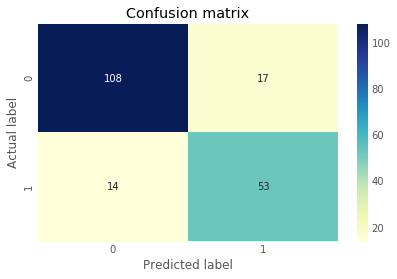

In [51]:
y_pred_dt = model_dt.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
# Generate confusion matrix.
tn, fp, fn, tp = confusion_matrix(y_test,
                                  y_pred_dt).ravel()

print(confusion_matrix(y_test,
                       y_pred_dt))

[[108  17]
 [ 14  53]]


In [53]:
# Calculate sensitivity.

sens = tp / (tp + fn)

print(f'Sensitivity: {round(sens, 4)}')

Sensitivity: 0.791


In [54]:
# Calculate specificity.

spec = tn / (tn + fp)

print(f'Specificity: {round(spec, 4)}')

Specificity: 0.864


In [55]:
y_pred_proba_dt = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)

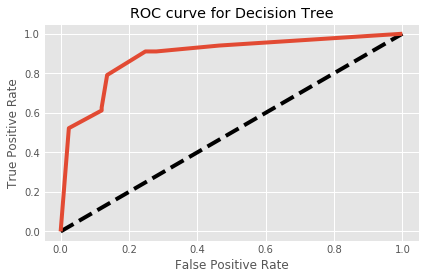

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree')
plt.show()

In [57]:
# Area under ROC curve

roc_auc_score(y_test,y_pred_proba_dt)

0.8867462686567165

In [58]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       125
           1       0.76      0.79      0.77        67

    accuracy                           0.84       192
   macro avg       0.82      0.83      0.82       192
weighted avg       0.84      0.84      0.84       192



### In a Nutshel

In [59]:
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    abc.append(metrics.accuracy_score(prediction,y_test))
models_dataframe = pd.DataFrame(abc,index=classifiers)   
models_dataframe.columns = ['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.755208
Radial Svm,0.651042
Logistic Regression,0.713542
Decision Tree,0.828125
KNN,0.864583


The above algorithms are not giving vey high accuracy. This can be improved by using Feature Selection and using only relevant features. We can also use ensembling or averaging of different algorithms. I will do these things in subsequent parts.

## Feature Extraction/ Selection:

1) A lot many features can affect the accuracy of the algorithm.    

2) Feature Extraction means to select only the important features in-order to improve the accuracy of the algorithm.  

3) It reduces training time and reduces overfitting  

4) We can choose important features in 2 ways:  

a) Correlation matrix--> selecting only the uncorrelated features.  

b) RandomForestClassifier--> It gives the importance of the features  

### Correlation Matrix

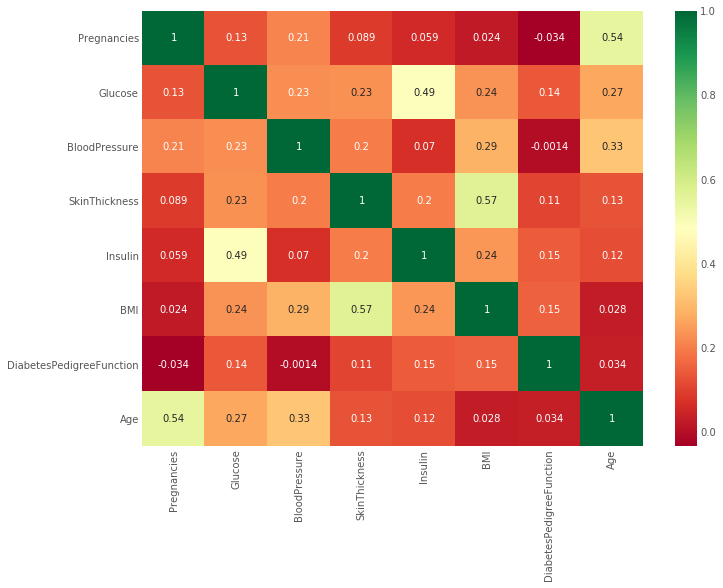

In [60]:
sns.heatmap(diab[diab.columns[:8]].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

Observations:  
All the features look to be uncorrelated. So we cannot eliminate any features just by looking at the correlation matrix.

## Random Forest Classifier

In [61]:
model_rf= RandomForestClassifier(n_estimators=100,random_state=0)
X = diab[diab.columns[:8]]
y = diab['Outcome']
model_rf.fit(X,y)
pd.Series(model_rf.feature_importances_,index=X.columns).sort_values(ascending=False)

Insulin                     0.363715
SkinThickness               0.146408
Glucose                     0.140869
Age                         0.092266
BMI                         0.090501
DiabetesPedigreeFunction    0.070971
Pregnancies                 0.051046
BloodPressure               0.044224
dtype: float64

Observations:    
The important features are: Insulin, Glucose, SkinThickness, Age, BMI

### Standardisation

 There can be a lot of deviation in the given dataset. An example in the dataset can be the BMI where it has 248 unique values. This high variance has to be standardised. Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

### Using Only Important Features And Standardisation

In [62]:
diab2 = diab[['Insulin','SkinThickness','Glucose','Age','BMI','Outcome']]

from sklearn.preprocessing import StandardScaler #Standardisation
features = diab2[diab2.columns[:5]]

sc = StandardScaler()
features_standard= sc.fit_transform(features)# Gaussian Standardisation

x = pd.DataFrame(features_standard,columns=['Insulin','SkinThickness','Glucose','Age','BMI'])
x['Outcome'] = diab2['Outcome']
outcome = x['Outcome']
train1,test1 = train_test_split(x, test_size=0.25, random_state=0, stratify=x['Outcome'])
train_X1 = train1[train1.columns[:5]]
test_X1 = test1[test1.columns[:5]]
train_Y1 = train1['Outcome']
test_Y1 = test1['Outcome']

In [63]:
# SAVING SCALER FOR FLASK
from sklearn.externals.joblib import dump, load
dump(sc, './flask_app/static/model/diabetes.pkl', compress = True)

['./flask_app/static/model/diabetes.pkl']

In [64]:
abc = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','Decision Tree', 'KNN']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction = model.predict(test_X1)
    abc.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe = pd.DataFrame(abc,index=classifiers)   
new_models_dataframe.columns = ['New Accuracy']    

In [65]:
new_models_dataframe = new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['Increase'] = new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,Increase
Linear Svm,0.791667,0.755208,0.036458
Radial Svm,0.822917,0.651042,0.171875
Logistic Regression,0.770833,0.713542,0.057292
Decision Tree,0.859375,0.828125,0.031250
KNN,0.807292,0.864583,-0.057292


The above dataframe shows the new accuracy of the models after feature selection. We can see that the Accuarcy for Radial Svm increases by 17% and for Logistic Regression and Decision Tree the Accuracy increases 2% and 3%. For KNN  the accuracy decreases.

### Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.  

1) The K-Fold Cross Validation works by first dividing the dataset into k-subsets.  

2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.  

3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.  

This is called K-Fold Cross Validation.  
  
4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [66]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation

In [67]:
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

In [68]:
xyz = []
accuracy = []
classifiers = ['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x[x.columns[:5]],x['Outcome'], cv = kfold,scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame(abc,index=classifiers)   
new_models_dataframe2.columns = ['CV Mean']    
new_models_dataframe2

,CV Mean
Linear Svm,0.791667
Radial Svm,0.822917
Logistic Regression,0.770833
Decision Tree,0.859375
KNN,0.807292


### Ensembling

Ensemble methods are techniques that create multiple models and then combine them to produce improved results. Ensemble methods usually produces more accurate solutions than a single model would. The models used to create such ensemble models are called ‘base models’.  

We will do ensembling with the Voting Ensemble. Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.  

We will be using weighted Voting Classifier. We will assign to the classifiers according to their accuracies. So the classifier with single accuracy will be assigned the highest weight and so on.  

In our case, we will use the Top 3 classifiers i.e Linaer SVM, Radial(rbf) SVM and Logistic Regression classifiers.

In [69]:
linear_svc=svm.SVC(kernel='linear',C=0.1,gamma=10,probability=True)
radial_svm=svm.SVC(kernel='rbf',C=0.1,gamma=10,probability=True)
lr=LogisticRegression(C=0.1)

In [70]:
from sklearn.ensemble import VotingClassifier #for Voting Classifier

### Linear and Radial SVM

In [71]:
ensemble_lin_rbf=VotingClassifier(estimators=[('Linear_svm', linear_svc), ('Radial_svm', radial_svm)], 
                       voting='soft', weights=[2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear and Radial SVM is:',ensemble_lin_rbf.score(test_X1,test_Y1))

The accuracy for Linear and Radial SVM is: 0.7916666666666666


### Linear SVM with Logistic Regression

In [72]:
ensemble_lin_lr = VotingClassifier(estimators = [('Linear_svm', linear_svc), ('Logistic Regression', lr)], 
                       voting='soft', weights = [2,1]).fit(train_X1,train_Y1)
print('The accuracy for Linear SVM and Logistic Regression is:',ensemble_lin_lr.score(test_X1,test_Y1))

The accuracy for Linear SVM and Logistic Regression is: 0.7864583333333334


### Logistic Regression with Radial SVM

In [73]:
ensemble_rad_lr = VotingClassifier(estimators = [('Radial_svm', radial_svm), ('Logistic Regression', lr)], 
                       voting='soft', weights = [1,2]).fit(train_X1,train_Y1)
print('The accuracy for Radial SVM and Logistic Regression is:',ensemble_rad_lr.score(test_X1,test_Y1))

The accuracy for Radial SVM and Logistic Regression is: 0.7916666666666666


### All 3 classifiers combined

In [74]:
ensemble_rad_lr_lin=VotingClassifier(estimators=[('Radial_svm', radial_svm), ('Logistic Regression', lr),('Linear_svm',linear_svc)], 
                       voting='soft', weights=[2,1,3]).fit(train_X1,train_Y1)
print('The ensembled model with all the 3 classifiers is:',ensemble_rad_lr_lin.score(test_X1,test_Y1))

The ensembled model with all the 3 classifiers is: 0.796875


So the maximum Accuracy which we could get by using ensemble models is 79.68%

In [75]:
pickle.dump(ensemble_rad_lr, open('./flask_app/static/model/diabetes.pkl', 'wb'))